In [41]:
import torch

from matplotlib import pyplot as plt

In [2]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


# Input model

We consider an input that evolves as an AR(1) model:
$$
S_t = \phi S_{t-1} + \sigma\xi_t
$$
where $\xi_t$ are iid random variables from a unit Gaussian distribution, and $\phi, \sigma$ are real parameters. The autocovariance is given by
$$
\langle S_{\tau} S_{\tau + t} \rangle = \frac{\sigma^2}{1 - \phi^2} \phi^{|t|}
$$

In [21]:
def toeplitz(x, y):
    N = len(x)
    x_y = torch.cat((x, y[1:].flip(-1)), dim=-1)
    result = torch.zeros((N, N))
    for i in range(N):
        result[i] = torch.roll(x_y, i, dims=-1)[:N]
    return result

In [35]:
def ar_cov(t, phi, sigma):
    return sigma**2 / (1.0 - phi**2) * phi**(torch.abs(t))

In [50]:
t = torch.arange(0, 20)

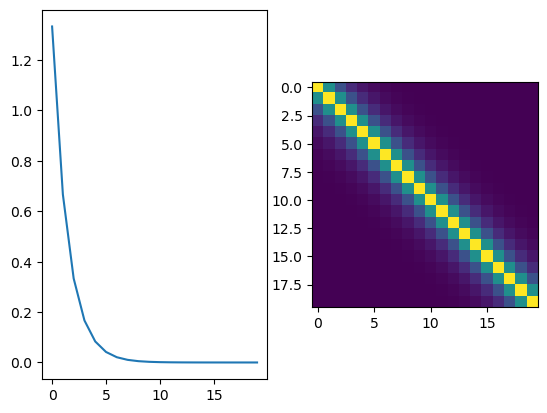

In [58]:
s_cov = ar_cov(t, 0.5, 1.0)
s_cov_mat = toeplitz(s_cov, s_cov)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(s_cov)
ax2.imshow(s_cov_mat)

In [69]:
s_dist = torch.distributions.MultivariateNormal(torch.zeros(s_cov_mat.size(0)), s_cov_mat)
s_dist.sample((1000,))

tensor([[-1.5264, -1.2257, -0.8098,  ...,  0.6357, -0.8773, -0.1810],
        [ 1.5907, -0.3000,  0.6788,  ..., -1.0993, -0.6416, -0.4175],
        [ 1.0888,  1.1959,  1.3645,  ...,  0.7386,  2.0004, -0.0472],
        ...,
        [-0.3974,  0.6423, -1.8756,  ...,  0.2712,  0.4568,  0.4163],
        [ 1.2706,  1.8115,  2.3464,  ..., -0.8356, -1.9428, -0.5567],
        [ 1.8176,  1.7261,  0.6563,  ...,  1.4442,  0.8636,  1.6932]])